In [1]:
# Import libraries
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
'''
From postman, we have several urls called: the one bellow gives enough information for what we need
'''
url_site = 'https://www.topuniversities.com'
url_ranking = '/sites/default/files/qs-rankings-data/357051.txt?_=1508859120564'
req = requests.get(url_site + url_ranking)
data = req.json()['data'][:200]

In [3]:
'''
This function will get the value for the specified parameter in the html file (as a request)
'''
def getValue(request, parameter):
    soup = BeautifulSoup(request.text, 'html.parser')
    outer = soup.find('div', class_ = parameter)
    if (outer == None):
        print('Error when looking for ' + parameter)
        return 'NaN'
    value = int(outer.find('div', class_ = 'number').text.replace(',', ''))
    return value

In [4]:
uniUrls = []
uniReq = []
for uni in data:
    uniUrls.append(uni['url'])
    uniReq.append(requests.get(url_site + uniUrls[-1]))

In [42]:
columns_name = ['Rank', 'Country', 'Region', 'Faculty members (total)', 'Faculty members (international)', 'Students (total)', 'Students (international)', 'Ratio between faculty members and students', 'Ratio of international students']
df = pd.DataFrame(columns = columns_name)

for index, uni in enumerate(data):
    rank = uni['rank_display'].replace('=', '')
    country = uni['country']
    region = uni['region']
    fac_members_total = getValue(uniReq[index], 'total faculty')
    fac_members_int = getValue(uniReq[index], 'inter faculty')
    students_total = getValue(uniReq[index], 'total student')
    students_int = getValue(uniReq[index], 'total inter')
    if (students_total != 'NaN' and fac_members_total != 'NaN' and students_int != 'NaN'):
        ratio_fac_students = students_total / fac_members_total
        percentage_int_students = students_int / students_total
    else:
        ratio_fac_students = -1
        percentage_int_students = -1
    df.loc[uni['title']] = [rank, country, region, fac_members_total, fac_members_int, students_total, students_int, ratio_fac_students, percentage_int_students]


Error when looking for total faculty
Error when looking for inter faculty
Error when looking for total student
Error when looking for total inter
Error when looking for inter faculty


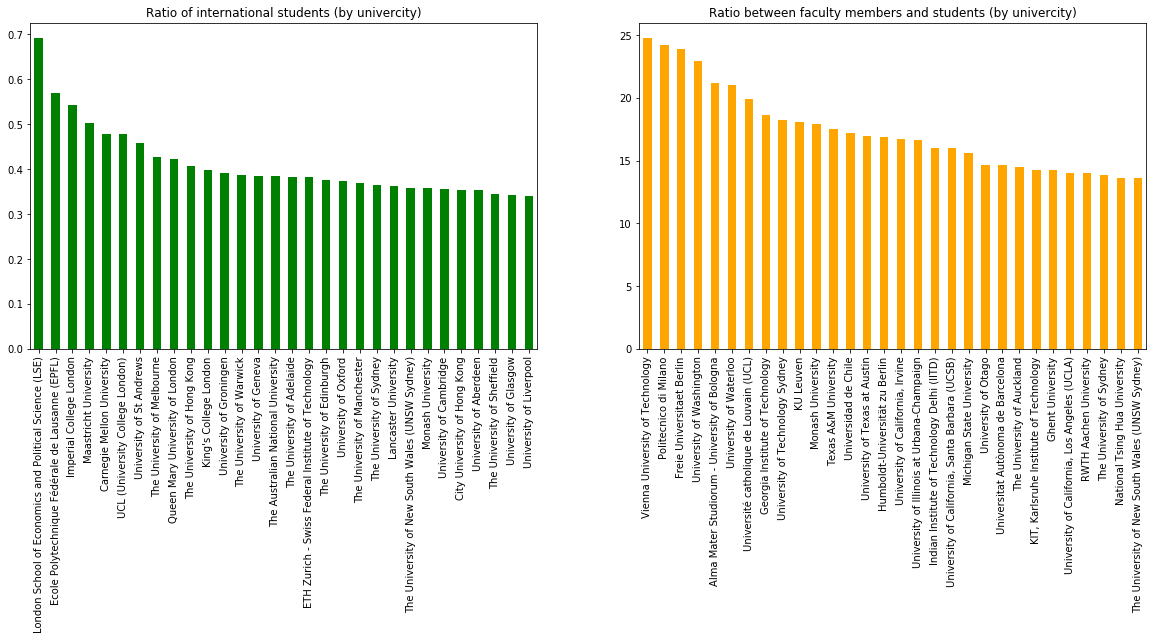

In [47]:
int_stud = df.sort_values('Ratio of international students', ascending = False)[['Ratio of international students', 'Country', 'Region']]
fac_memb = df.sort_values('Ratio between faculty members and students', ascending = False)[['Ratio between faculty members and students', 'Country', 'Region']]

unused,subplots = plt.subplots(1,2, figsize=(20,6))

int_stud['Ratio of international students'].head(30).plot(ax=subplots[0], kind='bar', title="Ratio of international students (by university)", color='green')
fac_memb['Ratio between faculty members and students'].head(30).plot(ax=subplots[1], kind='bar', title="Ratio between faculty members and students (by university)", color='orange')


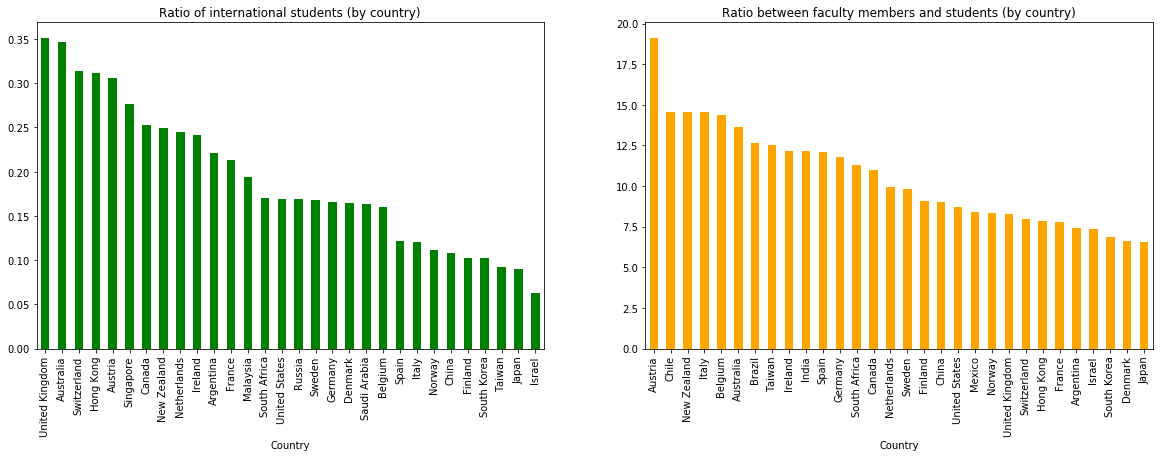

In [55]:
int_stud_country = int_stud.groupby(['Country']).mean().sort_values('Ratio of international students', ascending = False)
fac_memb_country = fac_memb.groupby(['Country']).mean().sort_values('Ratio between faculty members and students', ascending = False)

unused,subplots = plt.subplots(1,2, figsize=(20,6))

int_stud_country['Ratio of international students'].head(30).plot(ax=subplots[0], kind='bar', title="Ratio of international students (by country)", color='green')
fac_memb_country['Ratio between faculty members and students'].head(30).plot(ax=subplots[1], kind='bar', title="Ratio between faculty members and students (by country)", color='orange')


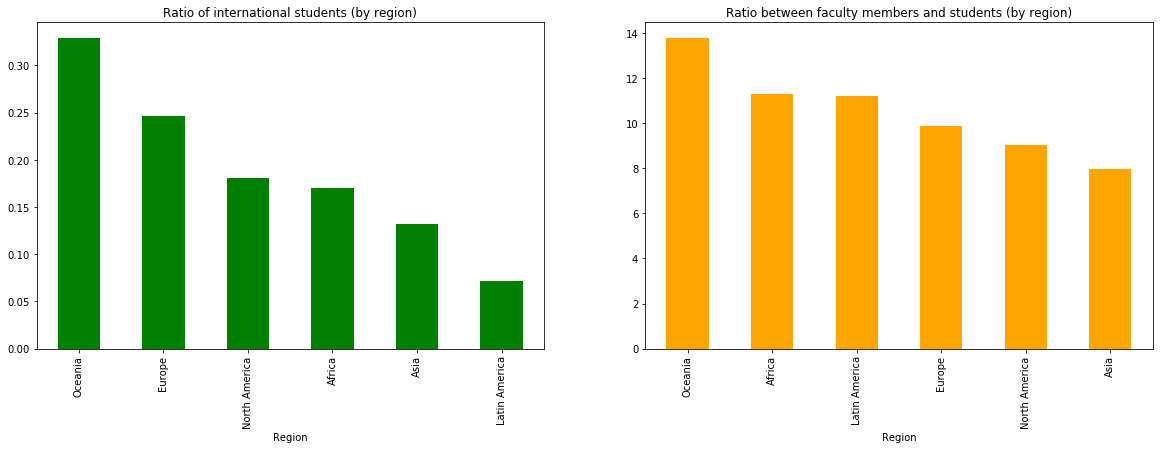

In [54]:
int_stud_region = int_stud.groupby(['Region']).mean().sort_values('Ratio of international students', ascending = False)
fac_memb_region = fac_memb.groupby(['Region']).mean().sort_values('Ratio between faculty members and students', ascending = False)

unused,subplots = plt.subplots(1,2, figsize=(20,6))

int_stud_region['Ratio of international students'].head(30).plot(ax=subplots[0], kind='bar', title="Ratio of international students (by region)", color='green')
fac_memb_region['Ratio between faculty members and students'].head(30).plot(ax=subplots[1], kind='bar', title="Ratio between faculty members and students (by region)", color='orange')
